# 1) Introdução
Notebook utilizado para analisar a distribuição do preço de petróleo Brent ao longo do tempo e criar os modelos de previsão de preço futuro.

In [ ]:
import requests
from google.colab import userdata
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib.dates import YearLocator
import seaborn as sns
import numpy as np
import itertools
import warnings


warnings.filterwarnings('ignore')

# 2) Obtendo os dados da API da EIA
Nesta etapa, utilizo a API de EIA para consultar os dados históricos do preço do petróleo Brent. Vale notar que foi realizado um cadastro no site deles, para disponibilizarem uma chave de API. A mesma foi configurado no Google Colabs para uso junto deste notebook, mas não pode ser incluída junto da entrega do projeto. Há também um limite para consulta da API, de 5000 registros por requisição, sendo necessário chamar o endpoint 2x.

In [ ]:
def obter_fechamento_petroleo_brent(offset: int = 0) -> pd.DataFrame:
  api_key = userdata.get('eia-api-key')
  per_request = 5000
  url = f'https://api.eia.gov/v2/petroleum/pri/spt/data/?frequency=daily&data[0]=value&facets[series][]=RBRTE&sort[0][column]=period&sort[0][direction]=desc&offset={offset}&length={per_request}&api_key={api_key}'

  response = requests.get(url)
  df = pd.DataFrame()

  if response.status_code == 200:
      data = response.json()
      df = pd.DataFrame(data['response']['data'])
  else:
      print("Falha na requisição:", response.status_code)

  return df

In [ ]:
df1 = obter_fechamento_petroleo_brent()
df2 = obter_fechamento_petroleo_brent(5000)
df_concat = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df_concat.shape

(9388, 11)

In [ ]:
df_concat.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-04-29,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),88.44,$/BBL
1,2024-04-26,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),89.95,$/BBL
2,2024-04-25,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),88.1,$/BBL
3,2024-04-24,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),89.02,$/BBL
4,2024-04-23,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),88.29,$/BBL


In [ ]:
df_concat.tail()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
9383,1987-05-26,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.63,$/BBL
9384,1987-05-25,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.6,$/BBL
9385,1987-05-22,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.55,$/BBL
9386,1987-05-21,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.45,$/BBL
9387,1987-05-20,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.63,$/BBL


In [ ]:
# verificando se a concatenação funcionou no limite da paginação (5000 registros)
df_concat.iloc[4995:5005, :]

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
4995,2004-08-26,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),40.65,$/BBL
4996,2004-08-25,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),42.39,$/BBL
4997,2004-08-24,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),42.99,$/BBL
4998,2004-08-23,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.39,$/BBL
4999,2004-08-20,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),45.46,$/BBL
5000,2004-08-19,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.84,$/BBL
5001,2004-08-18,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.12,$/BBL
5002,2004-08-17,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.05,$/BBL
5003,2004-08-16,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.35,$/BBL
5004,2004-08-13,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.13,$/BBL


## 2.1) Exportando os dados da API
Nesta seção, exporto os dados brutos que vieram da API.

In [ ]:
df_concat.to_csv('preco-petroleo-brent-eia.csv', index=False)

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9388 entries, 0 to 9387
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              9388 non-null   object
 1   duoarea             9388 non-null   object
 2   area-name           9388 non-null   object
 3   product             9388 non-null   object
 4   product-name        9388 non-null   object
 5   process             9388 non-null   object
 6   process-name        9388 non-null   object
 7   series              9388 non-null   object
 8   series-description  9388 non-null   object
 9   value               9388 non-null   object
 10  units               9388 non-null   object
dtypes: object(11)
memory usage: 806.9+ KB


## 2.2) Testando os dados exportados
Nesta seção, importamos os dados gerados anteriormente e passamos a utilizá-los pelo resto do projeto.

In [ ]:
df = pd.read_csv('preco-petroleo-brent-eia.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9388 entries, 0 to 9387
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period              9388 non-null   object 
 1   duoarea             9388 non-null   object 
 2   area-name           0 non-null      float64
 3   product             9388 non-null   object 
 4   product-name        9388 non-null   object 
 5   process             9388 non-null   object 
 6   process-name        9388 non-null   object 
 7   series              9388 non-null   object 
 8   series-description  9388 non-null   object 
 9   value               9388 non-null   float64
 10  units               9388 non-null   object 
dtypes: float64(2), object(9)
memory usage: 806.9+ KB


## 2.3) Padronizando os dados originais para uma timeseries
Nesta seção aplico algumas tratativas nos dados brutos, como conversão de tipo de algumas colunas e renomeação de outras.

In [ ]:
df.period = pd.to_datetime(df.period)
df.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-04-29,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),88.44,$/BBL
1,2024-04-26,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),89.95,$/BBL
2,2024-04-25,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),88.10,$/BBL
3,2024-04-24,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),89.02,$/BBL
4,2024-04-23,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),88.29,$/BBL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9388 entries, 0 to 9387
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period              9388 non-null   datetime64[ns]
 1   duoarea             9388 non-null   object        
 2   area-name           0 non-null      float64       
 3   product             9388 non-null   object        
 4   product-name        9388 non-null   object        
 5   process             9388 non-null   object        
 6   process-name        9388 non-null   object        
 7   series              9388 non-null   object        
 8   series-description  9388 non-null   object        
 9   value               9388 non-null   float64       
 10  units               9388 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 806.9+ KB


In [ ]:
df_oil = df[['period', 'value']]
df_oil.columns = ['ds', 'y']
df_oil.head()

,ds,y
0,2024-04-29,88.44
1,2024-04-26,89.95
2,2024-04-25,88.10
3,2024-04-24,89.02
4,2024-04-23,88.29


## 2.4) Exportandos os dados padronizados
Com os dados padronizados, exportamos novamente, agora com gerando um novo arquivo que irá conter os dados limpos.

In [ ]:
df_oil.to_csv('timeseries-petroleo-brent.csv', index=False)

In [ ]:
df_oil = pd.read_csv('timeseries-petroleo-brent.csv')
df_oil.ds = pd.to_datetime(df_oil.ds)
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9388 entries, 0 to 9387
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9388 non-null   datetime64[ns]
 1   y       9388 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.8 KB


## 2.5) Analisando os dados históricos
Nesta seção, fazemos uma análise rápida sobre a distribuição dos preços.

<Axes: xlabel='y', ylabel='Count'>

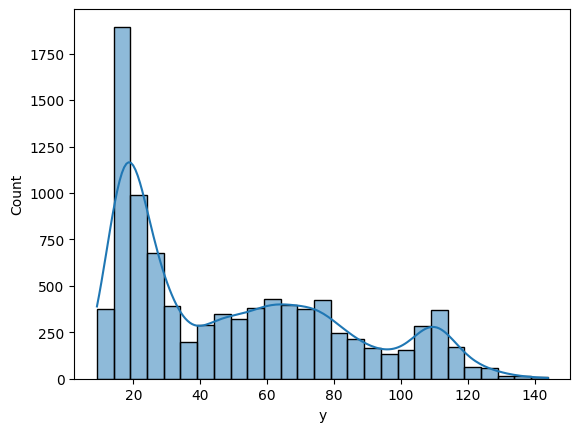

In [ ]:
sns.histplot(data=df_oil.y, kde=True)

<Axes: ylabel='y'>

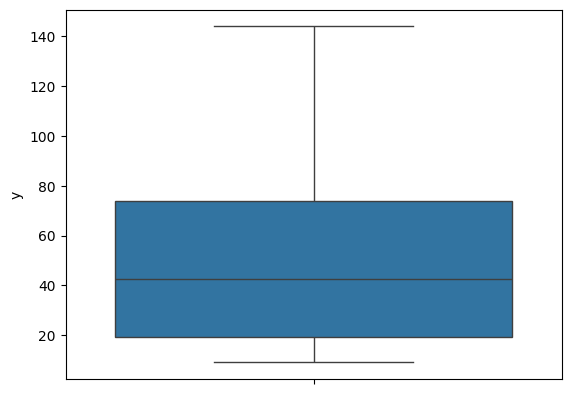

In [ ]:
sns.boxplot(data=df_oil.y)

À seguir, criei um estudo a respeito de 12 momentos chave durante as décadas que influenciaram o preço do barril de petróleo.

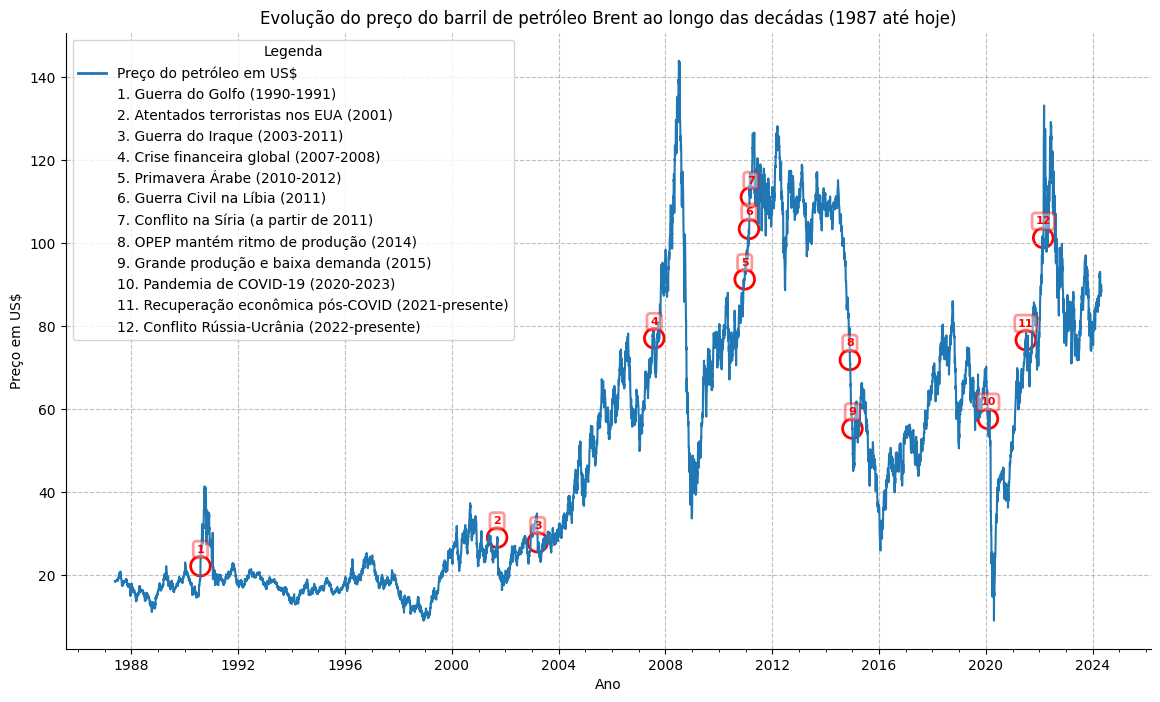

In [ ]:
# função para plot do momento chave
def plot_momentos_chaves_preco_petroleo(ponto: pd.Series, id_evento: int):
  if not ponto.empty:
    plt.scatter(ponto.ds, float(ponto.y), s=200, facecolors='none', edgecolors='red', linewidths=2)
    plt.text(ponto.ds, float(ponto.y) + 4, id_evento, ha='center', va='center', fontsize=8, fontweight='bold', color='red', bbox=dict(facecolor='white', alpha=0.4, edgecolor='red', boxstyle='round', lw=2))

# função para definir a legenda
def set_legenda():
  legend_handles, _ = plt.gca().get_legend_handles_labels()
  extra_labels = [
      ('Preço do petróleo em US$', '#1F77B4', 'line'),
      ('1. Guerra do Golfo (1990-1991)', 'red', 'dot'),
      ('2. Atentados terroristas nos EUA (2001)', 'red', 'dot'),
      ('3. Guerra do Iraque (2003-2011)', 'red', 'dot'),
      ('4. Crise financeira global (2007-2008)', 'red', 'dot'),
      ('5. Primavera Árabe (2010-2012)', 'red', 'dot'),
      ('6. Guerra Civil na Líbia (2011)', 'red', 'dot'),
      ('7. Conflito na Síria (a partir de 2011)', 'red', 'dot'),
      ('8. OPEP mantém ritmo de produção (2014)', 'red', 'dot'),
      ('9. Grande produção e baixa demanda (2015)', 'red', 'dot'),
      ('10. Pandemia de COVID-19 (2020-2023)', 'red', 'dot'),
      ('11. Recuperação econômica pós-COVID (2021-presente)', 'red', 'dot'),
      ('12. Conflito Rússia-Ucrânia (2022-presente)', 'red', 'dot')
  ]

  for label, cor, tipo in extra_labels:
      if tipo == 'line':
        legend_handles.append(plt.Line2D([0], [0], color=cor, lw=2, label=label))
      elif tipo == 'dot':
        legend_handles.append(plt.Line2D([0], [0], marker=None, color='None', label=label))

  plt.legend(title='Legenda', loc='upper left', handles=legend_handles)

plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=df_oil, x='ds', y='y', legend=False)
ax.set_ylabel('Preço em US$')
ax.set_xlabel('Ano')
plt.gca().xaxis.set_minor_locator(YearLocator())

plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "1990-08-02"'), 1)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2001-09-11"'), 2)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2003-03-20"'), 3)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2007-08-01"'), 4)
# dia aproximado, já que em 18/12/2010, o mercado não operou (foi um sábado)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2010-12-20"'), 5)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2011-02-17"'), 6)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2011-03-15"'), 7)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2014-11-28"'), 8)
# não consegui encontrar uma data específica para o fato (utilizado o primeiro dia útil onde houve negociação)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2015-01-02"'), 9)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2020-01-30"'), 10)
# aqui estipulei o meio do ano como o início da recuperação, não encontrei uma data exata e no início do ano ainda estavamos sofrendo a onda mais forte da COVID-19
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2021-07-01"'), 11)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2022-02-24"'), 12)

plt.grid(linestyle='--', color='gray', alpha=0.5)
sns.despine()
set_legenda()
plt.title('Evolução do preço do barril de petróleo Brent ao longo das decádas (1987 até hoje)')
plt.show()

Dos últimos 34 anos, houveram pelo menos 12 momentos chave que influenciaram o preço do barril de petróleo de forma significativa, conforme a seguir:
1. Guerra do Golfo (1990-1991)
2. Atentados terroristas nos EUA (2001)
3. Guerra do Iraque (2003-2011)
4. Crise financeira global (2007-2008)
5. Primavera Árabe (2010-2012)
6. Guerra Civil na Líbia (2011)
7. Conflito na Síria (a partir de 2011)
8. Decisão dos membros da OPEP em manter o ritmo de produção (2014)
9. Grande aumento de produção pelos EUA e baixa demanda pela Europa e Ásia (2015)
10. Pandemia de COVID-19 (2020-2023)
11. Recuperação econômica pós-COVID (2021-presente)
12. Conflito Rússia-Ucrânia (2022-presente)

# 3) Preparando para executar os algoritmos de Machine Learning

In [ ]:
# função responsável por retornar a mesma janela de dados para utilização nos algoritmos de Machine Learning
def obter_dados_ml() -> pd.DataFrame:
  return df_oil.query('ds >= "2020-01-01"')

# 3) Prophet
Vamos utilizar a biblioteca Prophet para realizar as previsões do preço do barril de petróleo. Para otimizar o modelo, serão utilizados dados a partir de 01/01/2020. Vale notar que o período escolhido engloba o início e fim da pandemia de COVID-19 (queda acentuada de preço) e o início da guerra entre a Rússia e a Ucrânia (aumento acentuado de preço).

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.serialize import model_to_json
from datetime import datetime, timedelta

In [ ]:
df_oil.head()

,ds,y
0,2024-04-29,88.44
1,2024-04-26,89.95
2,2024-04-25,88.10
3,2024-04-24,89.02
4,2024-04-23,88.29


In [ ]:
# obtém os dados para ML
df_ml = obter_dados_ml()

In [ ]:
df_ml.head()

,ds,y
0,2024-04-29,88.44
1,2024-04-26,89.95
2,2024-04-25,88.10
3,2024-04-24,89.02
4,2024-04-23,88.29


In [ ]:
df_ml.shape

(1102, 2)

In [ ]:
# https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning
def obter_melhores_hiperparametros_prophet(train_data: pd.DataFrame):
  param_grid = {
      'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
      'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
  }

  # todas combinações de parâmetros configuradas
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  rmses = []

  # cross_validation para avaliar todos os parâmetros
  for params in all_params:
      m = Prophet(**params).fit(train_data)
      df_cv = cross_validation(m, horizon='30 days', parallel="processes")
      df_p = performance_metrics(df_cv, rolling_window=1)
      rmses.append(df_p['rmse'].values[0])

  # procurando os melhores hiperparâmetros
  tuning_results = pd.DataFrame(all_params)
  tuning_results['rmse'] = rmses
  print(tuning_results)

  # melhores parâmetros
  best_params = all_params[np.argmin(rmses)]
  print(best_params)

**Comentário**<br/>
Código executado previamente, obtendo o valor **{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}**. Desativado para fins de acelerar a execução do notebook.

In [ ]:
# obter_melhores_hiperparametros_prophet(df_ml)

In [ ]:
# cria o modelo do prophet com os melhores hiperparâmetros
modelo = Prophet(seasonality_mode='additive', daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.5, seasonality_prior_scale=0.01)
modelo.add_country_holidays(country_name='BR')
modelo.fit(df_ml)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d00mutf/z2ii8n22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d00mutf/xbydpr63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82783', 'data', 'file=/tmp/tmp5d00mutf/z2ii8n22.json', 'init=/tmp/tmp5d00mutf/xbydpr63.json', 'output', 'file=/tmp/tmp5d00mutf/prophet_modelwk3hkjfd/prophet_model-20240502012113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:21:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# faz a previsão dos próximos 30 dias para o preço do barril de petróleo do tipo Brent
df_futuro = modelo.make_future_dataframe(periods=30, freq='D')
previsao = modelo.predict(df_futuro)
previsao.tail(45)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Confraternização Universal,Confraternização Universal_lower,Confraternização Universal_upper,Dia do Trabalhador,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1087,2024-04-08,95.522944,85.002464,92.587523,95.522944,95.522944,0.0,0.0,0.0,0.000000,...,-0.007717,-0.007717,-0.007717,-6.832547,-6.832547,-6.832547,0.0,0.0,0.0,88.682680
1088,2024-04-09,95.605086,84.881389,93.088486,95.605086,95.605086,0.0,0.0,0.0,0.000000,...,0.008657,0.008657,0.008657,-6.721868,-6.721868,-6.721868,0.0,0.0,0.0,88.891875
1089,2024-04-10,95.687228,84.712031,93.013502,95.687228,95.687228,0.0,0.0,0.0,0.000000,...,-0.031724,-0.031724,-0.031724,-6.642100,-6.642100,-6.642100,0.0,0.0,0.0,89.013405
1090,2024-04-11,95.769370,85.027723,92.924835,95.769370,95.769370,0.0,0.0,0.0,0.000000,...,-0.105529,-0.105529,-0.105529,-6.594275,-6.594275,-6.594275,0.0,0.0,0.0,89.069566
1091,2024-04-12,95.851512,85.559534,93.569366,95.851512,95.851512,0.0,0.0,0.0,0.000000,...,0.156180,0.156180,0.156180,-6.578521,-6.578521,-6.578521,0.0,0.0,0.0,89.429171
1092,2024-04-15,96.097938,85.473209,93.376723,96.097938,96.097938,0.0,0.0,0.0,0.000000,...,-0.007717,-0.007717,-0.007717,-6.711776,-6.711776,-6.711776,0.0,0.0,0.0,89.378445
1093,2024-04-17,96.262222,85.287665,93.260457,96.262222,96.262222,0.0,0.0,0.0,0.000000,...,-0.031724,-0.031724,-0.031724,-6.925064,-6.925064,-6.925064,0.0,0.0,0.0,89.305434
1094,2024-04-18,96.344364,85.118575,93.201811,96.344364,96.344364,0.0,0.0,0.0,0.000000,...,-0.105529,-0.105529,-0.105529,-7.057668,-7.057668,-7.057668,0.0,0.0,0.0,89.181166
1095,2024-04-19,96.426506,85.638463,93.562245,96.426506,96.426506,0.0,0.0,0.0,0.000000,...,0.156180,0.156180,0.156180,-7.201302,-7.201302,-7.201302,0.0,0.0,0.0,89.381384
1096,2024-04-22,96.672931,85.187106,93.120066,96.672931,96.672931,0.0,0.0,0.0,0.000000,...,-0.007717,-0.007717,-0.007717,-7.646310,-7.646310,-7.646310,0.0,0.0,0.0,89.018904


In [ ]:
# plot dos preços históricos (desde 2020) + janela de previsão
fig = plot_plotly(modelo, previsao, trend=True, figsize=(1200, 900))

# para checar as configs criadas pelo Plotly
# print(fig)

linha_azul = go.Scatter(x=[2020, previsao.iloc[-1, :].ds], y=[0, 0], mode='lines', line=dict(color='blue'), name='US$ 0,00')
linha_amarela = go.Scatter(x=[2020, previsao.iloc[-1, :].ds], y=[50, 50], mode='lines', line=dict(color='gold'), name='US$ 50,00')
linha_vermelha = go.Scatter(x=[2020, previsao.iloc[-1,:].ds], y=[100, 100], mode='lines', line=dict(color='red'), name='US$ 100,00')
fig.update_layout(title='Distribuição do valor (US$) do barril de petróleo Brent entre 2020 e os dias atuais + previsão dos próximos 30 dias', showlegend=True)
fig.data[0].name = 'Realidade'
fig.data[1].name = 'Banda inferior da previsão'
fig.data[1].fill = 'tonexty'
fig.data[1].fillcolor = 'rgba(0, 114, 178, 0.2)'
fig.data[2].name = 'Previsão'
fig.data[3].name = 'Banda superior da previsão'
fig.data[4].name = 'Tendência'
fig.add_trace(linha_azul)
fig.add_trace(linha_amarela)
fig.add_trace(linha_vermelha)
fig.show()

In [ ]:
plot_components_plotly(modelo, previsao)

In [ ]:
def calcular_mape_previsao(previsao: pd.DataFrame, train_data: pd.DataFrame):
  # extrai as colunas relevantes dos dataframes
  previsao_cols = ['ds', 'yhat']
  valores_reais_cols = ['ds', 'y']

  previsao = previsao[previsao_cols]
  valores_reais = train_data[valores_reais_cols]

  # merge os dataframes nas colunas 'ds' para comparar previsões e valores reais
  resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

  # calcula o erro percentual absoluto para cada ponto de dados
  resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100

  # cálculo do MAPE
  mape = np.mean(resultados['erro_percentual_absoluto'])
  mape_decimal = np.round(mape / 100, 2)

  print(f'MAPE decimal: {mape_decimal:.2f}')
  print(f"MAPE: {mape:.8f}%")

In [ ]:
calcular_mape_previsao(previsao, df_ml)

MAPE decimal: 0.03
MAPE: 3.49517760%


In [ ]:
df_cv = cross_validation(modelo, horizon='90 days', parallel="processes")
df_p = performance_metrics(df_cv)
df_p

INFO:prophet:Making 25 forecasts with cutoffs between 2021-02-14 00:00:00 and 2024-01-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x78e0ca647b80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d00mutf/148cqmy7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d00mutf/ebjbztoo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d00mutf/pw3_wvw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19932', 'data', 'file=/tmp/tmp5d00mutf/148cqmy7.json', 'init=/tmp/tmp5d00mutf/pw3_wvw1.json', 'output', 'file=/tmp/tmp5d00mutf/prophet_model2wjdvrx6/prophet_model-20240502012117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d00mutf/a05y0zku.json
DE

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,26.028642,5.101827,4.059271,0.048797,0.037373,0.048502,0.514957
1,10 days,28.647751,5.352359,4.261034,0.051196,0.039311,0.050833,0.500000
2,11 days,34.680884,5.889048,4.675032,0.055765,0.043020,0.055190,0.467949
3,12 days,40.654516,6.376089,5.051498,0.060001,0.046308,0.059188,0.438914
4,13 days,46.924620,6.850155,5.323456,0.062717,0.049566,0.061973,0.423454
...,...,...,...,...,...,...,...,...
77,86 days,302.759306,17.399980,12.819588,0.142323,0.115023,0.143535,0.835596
78,87 days,341.226222,18.472310,13.565189,0.149610,0.119191,0.150252,0.832321
79,88 days,368.680793,19.201062,14.003682,0.153580,0.116483,0.153973,0.836182
80,89 days,368.365428,19.192848,13.722217,0.150029,0.115575,0.150005,0.849170


### Exports
Nesta seção, exportamos o modelo Prophet em si e a matriz de performance do modelo, para uso posterior no Streamlit.

In [ ]:
# prepara o dataframe de performance
df_max_date = df_oil.ds.max()
df_p['dias_no_futuro'] = df_p['horizon'].apply(lambda horizon: int(str(horizon).split(' ')[0]))
df_p['data_no_futuro'] = df_p['dias_no_futuro'].apply(lambda dias: df_oil.ds.max() + timedelta(days=dias))
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage,dias_no_futuro,data_no_futuro
0,9 days,26.028642,5.101827,4.059271,0.048797,0.037373,0.048502,0.514957,9,2024-05-08
1,10 days,28.647751,5.352359,4.261034,0.051196,0.039311,0.050833,0.500000,10,2024-05-09
2,11 days,34.680884,5.889048,4.675032,0.055765,0.043020,0.055190,0.467949,11,2024-05-10
3,12 days,40.654516,6.376089,5.051498,0.060001,0.046308,0.059188,0.438914,12,2024-05-11
4,13 days,46.924620,6.850155,5.323456,0.062717,0.049566,0.061973,0.423454,13,2024-05-12
...,...,...,...,...,...,...,...,...,...,...
77,86 days,302.759306,17.399980,12.819588,0.142323,0.115023,0.143535,0.835596,86,2024-07-24
78,87 days,341.226222,18.472310,13.565189,0.149610,0.119191,0.150252,0.832321,87,2024-07-25
79,88 days,368.680793,19.201062,14.003682,0.153580,0.116483,0.153973,0.836182,88,2024-07-26
80,89 days,368.365428,19.192848,13.722217,0.150029,0.115575,0.150005,0.849170,89,2024-07-27


In [ ]:
df_p.to_csv('prophet-performance.csv', index=False)

In [ ]:
with open('prophet-model.json', 'w') as f_out:
    f_out.write(model_to_json(modelo))

# 4) LSTM
Nas próximas seções, iremos criar o modelo LSTM do Tensorflow + Keras.

In [ ]:
!pip install tensorflow

In [ ]:
import plotly.graph_objects as go

# Para deep learning
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator

# Para machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [ ]:
# função que retorna o pipeline de execução do modelo
def executar_pipeline(df: pd.DataFrame):
  pipeline = Pipeline([
      ('min_max_scaler', MinMax()),
  ])

  df_pipeline = pipeline.fit_transform(df)

  return pipeline, df_pipeline

In [ ]:
# classe responsável por aplicar o MinMaxScaler dentro do pipeline
class MinMax(BaseEstimator, TransformerMixin):
  def __init__(self, min_max_scaler_cols=['y']):
    self.min_max_scaler_cols = min_max_scaler_cols
    self.scaler = MinMaxScaler()

  def fit(self, df):
    return self

  def transform(self, df):
    if(set(self.min_max_scaler_cols).issubset(df.columns)):
      df[self.min_max_scaler_cols] = self.scaler.fit_transform(df[self.min_max_scaler_cols])
    else:
      print('[MinMax]', 'Uma ou mais features não estão no DataFrame.')

    return df

In [ ]:
# função responsável por executar o modelo LSTM
def executar_lstm(df: pd.DataFrame, pipeline: Pipeline, scaler_step_name, col_value, col_date, epochs: int = 20):
  lstm_values = df[col_value].values.reshape(-1, 1)
  split_percent = 0.80
  split = int(split_percent * len(lstm_values))

  print('Fazendo o split em treino e teste do dataset...')
  lstm_y_train = lstm_values[:split]
  lstm_y_test = lstm_values[split:]
  lstm_timestamp_train = df[col_date][:split]
  lstm_timestamp_test = df[col_date][split:]

  print(f'Total treino: {len(lstm_y_train)}')
  print(f'Total teste: {len(lstm_y_test)}')

  print('Configurando o modelo LSTM...')
  np.random.seed(777)
  look_back = 10
  neuronios = 200
  scaler = pipeline.named_steps[scaler_step_name].scaler

  # gerando sequências temporais para treinamento e teste do LSTM
  print('Gerando sequências temporais...')
  train_generator = TimeseriesGenerator(lstm_y_train, lstm_y_train, length=look_back, batch_size=20)
  test_generator = TimeseriesGenerator(lstm_y_test, lstm_y_test, length=look_back, batch_size=1)

  # configuração do LSTM
  print('Iniciando o modelo LSTM...')
  model = Sequential()
  model.add(LSTM(neuronios, activation='relu', input_shape=(look_back, 1)))
  model.add(Dense(1))
  model.summary()

  # treino do LSTM
  optimizer = Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='mse', metrics=[MeanSquaredError()])
  model.fit(train_generator, epochs=epochs, verbose=1)

  # faz previsões com base nos testes
  test_predictions = model.predict(test_generator)

  # reverte a normalização do MinMaxScaler
  test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))
  test_actuals_inv = scaler.inverse_transform(np.array(lstm_y_test).reshape(-1, 1))

  # ajusta dimensões
  test_actuals_inv = test_actuals_inv[:len(test_predictions_inv)]

  # cálculo do MSE
  lstm_mse = model.evaluate(test_generator, verbose=1)
  print(f'MSE (Erro Quadrático Médio): {lstm_mse[0]:.8f}')

  # cálculo do MAPE
  lstm_mape = np.mean(np.abs((test_actuals_inv - test_predictions_inv) / test_actuals_inv)) * 100
  print(f'MAPE: {lstm_mape:.8f}%')

  # cálculo do RMSE
  lstm_rmse = np.sqrt(lstm_mse[0])
  print(f'RMSE: {lstm_rmse:.8f}')

  prediction = model.predict(test_generator)

  errors = pd.DataFrame()
  errors['indicador'] = np.array(['MSE', 'RMSE', 'MAPE'])
  errors['valor'] = np.array([lstm_mse[0], lstm_rmse, lstm_mape])
  errors.to_csv('lstm-performance.csv', index=False)

  # mse = mean_squared_error(test_actuals_inv, prediction)
  # mae = mean_absolute_error(test_actuals_inv, prediction)
  # print(f'MSE-2: {mse}')
  # print(f'MAE: {mae}')

  plot_lstm_train = lstm_y_train.reshape((-1))
  plot_lstm_test = lstm_y_test.reshape((-1))
  prediction = prediction.reshape((-1))

  trace1 = go.Scatter(
      x = lstm_timestamp_train,
      y = plot_lstm_train,
      mode = 'lines',
      name = 'Passado'
  )

  trace2 = go.Scatter(
      x = lstm_timestamp_test,
      y = prediction,
      mode = 'lines',
      name = 'Previsão'
  )

  trace3 = go.Scatter(
      x = lstm_timestamp_test,
      y = plot_lstm_test,
      mode='lines',
      name = 'Ground Truth'
  )

  layout = go.Layout(
      title = "Prevendo o preço futuro do barril de petróleo Brent",
      xaxis = {'title' : "Data"},
      yaxis = {'title' : "Preço do barril (US$)"}
  )

  fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
  fig.show()

  return (model, scaler)

In [ ]:
df_ml = obter_dados_ml()

In [ ]:
df_ml.head()

,ds,y
0,2024-04-29,88.44
1,2024-04-26,89.95
2,2024-04-25,88.10
3,2024-04-24,89.02
4,2024-04-23,88.29


In [ ]:
# obtém os dados para ML
pipeline, df_ml = executar_pipeline(df_ml)

In [ ]:
df_ml.head()

,ds,y
0,2024-04-29,0.639368
1,2024-04-26,0.651540
2,2024-04-25,0.636627
3,2024-04-24,0.644043
4,2024-04-23,0.638159


In [ ]:
df_ml.shape

(1102, 2)

In [ ]:
# inverte a ordem do mais antigo para o mais recente (os dados da EIA vem invertidos)
df_ml.sort_values(by='ds', inplace=True)

In [ ]:
df_ml.head()

,ds,y
1101,2020-01-01,0.472755
1100,2020-01-02,0.466951
1099,2020-01-03,0.483315
1098,2020-01-06,0.492745
1097,2020-01-07,0.480574


À seguir, aplicamos a técnica de suavização da distribuição, mostrada pela profª Ana.

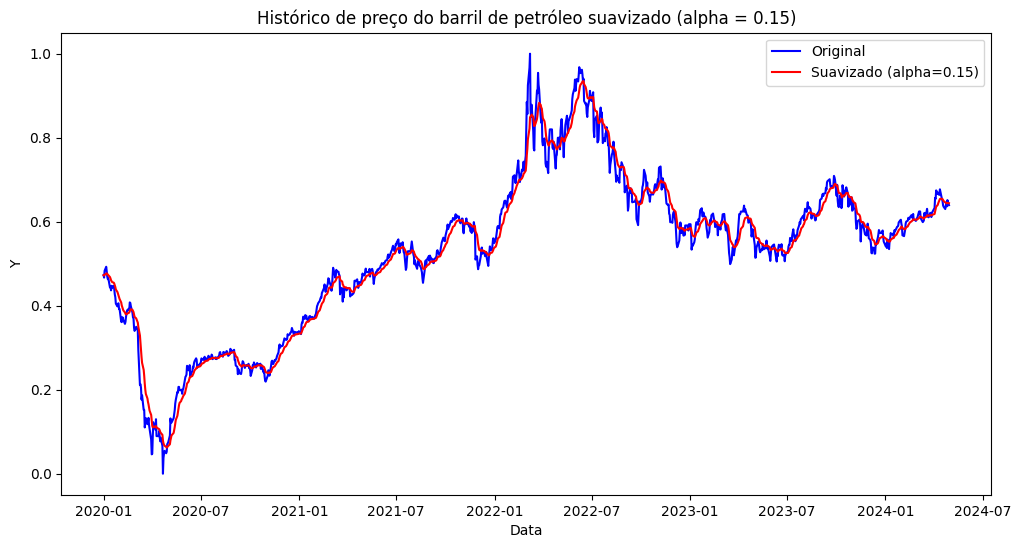

In [ ]:
# suaviza o preço
alpha = 0.15
df_ml['smoothed_y'] = df_ml['y'].ewm(alpha = alpha, adjust = False).mean()

# plot da linha suavizada
plt.figure(figsize=(12, 6))
plt.plot(df_ml['ds'], df_ml['y'], label='Original', color='blue')
plt.plot(df_ml['ds'], df_ml['smoothed_y'], label=f'Suavizado (alpha={alpha})', color='red')
plt.title(f'Histórico de preço do barril de petróleo suavizado (alpha = {alpha})')
plt.xlabel('Data')
plt.ylabel('Y')
plt.legend()
plt.show()

E executamos o modelo LSTM

In [ ]:
lstm_model, lstm_scaler = executar_lstm(df_ml, pipeline, 'min_max_scaler', 'smoothed_y', 'ds', epochs=250)

Fazendo o split em treino e teste do dataset...
Total treino: 881
Total teste: 221
Configurando o modelo LSTM...
Gerando sequências temporais...
Iniciando o modelo LSTM...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/250
44/44 [==============================] - 5s 52ms/step - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 2/250
44/44 [==============================] - 2s 40ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 3/250
44/44 [=

In [ ]:
# Função para prever os próximos 'num_prediction' pontos da série temporal
# Utiliza o modelo treinado para prever cada ponto sequencialmente
# A cada iteração, adiciona a previsão à lista 'prediction_list'
def lstm_predict(num_prediction, series, modelo, look_back = 10):
    prediction_list = series[-look_back:]

    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = modelo.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)

    prediction_list = prediction_list[look_back - 1:]

    return prediction_list

In [ ]:
# Função para gerar as datas dos próximos 'num_prediction' dias
def lstm_predict_dates(num_prediction):
    last_date = df_ml['ds'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction + 1).tolist()

    return prediction_dates

In [ ]:
num_prediction = 30 # definição dos próximos dias
forecast = lstm_predict(num_prediction, df_ml['y'].values.reshape((-1)), lstm_model, look_back=10)
forecast_dates = lstm_predict_dates(num_prediction)

1/1 [==============================] - 0s 66ms/step


In [ ]:
forecast

array([0.63936805, 0.64150906, 0.63741779, 0.6329782 , 0.62791085,
       0.62271577, 0.61686921, 0.61096251, 0.60498428, 0.59901649,
       0.59299213, 0.58706784, 0.58115411, 0.57527804, 0.56943041,
       0.56360352, 0.55778515, 0.55197126, 0.54615539, 0.54033363,
       0.53450394, 0.52866542, 0.52281773, 0.51696146, 0.51109743,
       0.50522685, 0.49935105, 0.49347159, 0.48758963, 0.48170659,
       0.47582391])

In [ ]:
forecast_dates

[Timestamp('2024-04-29 00:00:00'),
 Timestamp('2024-04-30 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-05-02 00:00:00'),
 Timestamp('2024-05-03 00:00:00'),
 Timestamp('2024-05-04 00:00:00'),
 Timestamp('2024-05-05 00:00:00'),
 Timestamp('2024-05-06 00:00:00'),
 Timestamp('2024-05-07 00:00:00'),
 Timestamp('2024-05-08 00:00:00'),
 Timestamp('2024-05-09 00:00:00'),
 Timestamp('2024-05-10 00:00:00'),
 Timestamp('2024-05-11 00:00:00'),
 Timestamp('2024-05-12 00:00:00'),
 Timestamp('2024-05-13 00:00:00'),
 Timestamp('2024-05-14 00:00:00'),
 Timestamp('2024-05-15 00:00:00'),
 Timestamp('2024-05-16 00:00:00'),
 Timestamp('2024-05-17 00:00:00'),
 Timestamp('2024-05-18 00:00:00'),
 Timestamp('2024-05-19 00:00:00'),
 Timestamp('2024-05-20 00:00:00'),
 Timestamp('2024-05-21 00:00:00'),
 Timestamp('2024-05-22 00:00:00'),
 Timestamp('2024-05-23 00:00:00'),
 Timestamp('2024-05-24 00:00:00'),
 Timestamp('2024-05-25 00:00:00'),
 Timestamp('2024-05-26 00:00:00'),
 Timestamp('2024-05-

In [ ]:
# obtém o scaler do pipeline
scaler = pipeline.named_steps['min_max_scaler'].scaler

In [ ]:
# gera o df do passado
df_past = df_ml[['ds', 'y']]
df_past.rename(columns={'y': 'valor_real'}, inplace=True)
df_past['ds'] = pd.to_datetime(df_past['ds'])
df_past['valor_real'] = scaler.inverse_transform(df_past['valor_real'].values.reshape(-1, 1))
df_past['previsao'] = np.nan
df_past['previsao'].iloc[-1] = df_past['valor_real'].iloc[-1]
df_past

,ds,valor_real,previsao
1101,2020-01-01,67.77,NaN
1100,2020-01-02,67.05,NaN
1099,2020-01-03,69.08,NaN
1098,2020-01-06,70.25,NaN
1097,2020-01-07,68.74,NaN
...,...,...,...
4,2024-04-23,88.29,NaN
3,2024-04-24,89.02,NaN
2,2024-04-25,88.10,NaN
1,2024-04-26,89.95,NaN


In [ ]:
df_past['valor_real'].values.reshape(-1, 1)

array([[67.77],
       [67.05],
       [69.08],
       ...,
       [88.1 ],
       [89.95],
       [88.44]])

In [ ]:
forecast = forecast.reshape(-1, 1)
forecast = scaler.inverse_transform(forecast)
forecast

array([[88.44      ],
       [88.7056135 ],
       [88.19805143],
       [87.64727561],
       [87.01862035],
       [86.37411857],
       [85.64879434],
       [84.916009  ],
       [84.1743502 ],
       [83.43398545],
       [82.68660327],
       [81.95163654],
       [81.21797864],
       [80.48899411],
       [79.76353677],
       [79.04065274],
       [78.31882613],
       [77.59755411],
       [76.87603807],
       [76.15378997],
       [75.4305584 ],
       [74.70623243],
       [73.9807677 ],
       [73.25423815],
       [72.52674731],
       [71.79844307],
       [71.06949181],
       [70.34008579],
       [69.61036919],
       [68.88051949],
       [68.15071416]])

In [ ]:
# gera o df do futuro
df_future = pd.DataFrame(columns=['ds', 'valor_real', 'previsao'])
df_future['ds'] = forecast_dates
df_future['valor_real'] = np.nan
df_future['previsao'] = forecast.flatten()
df_future.tail()

,ds,valor_real,previsao
26,2024-05-25,NaN,71.069492
27,2024-05-26,NaN,70.340086
28,2024-05-27,NaN,69.610369
29,2024-05-28,NaN,68.880519
30,2024-05-29,NaN,68.150714


Por fim, fazemos o plot do passado + futuro previsto pelo modelo.

In [ ]:
results_past =  df_past
results_past = results_past.set_index('ds')

plot_data = [
    go.Scatter(
        x=results_past.index,
        y=results_past['valor_real'],
        name='Atual'
    ),
    go.Scatter(
        x=df_future['ds'],
        y=df_future['previsao'],
        name='Previsão'
    )
]

plot_layout = go.Layout(
    title='Forecast IBOVESPA'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [ ]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras


## Exports
Com tudo finalizado, exporto o modelo LSTM e o scaler criado para uso posterior no Streamlit.

In [ ]:
import joblib
from keras.models import load_model

In [ ]:
lstm_model.save('lstm')
joblib.dump(scaler, 'lstm-scaler.pkl')

['lstm-scaler.pkl']

In [ ]:
lstm_model_recarregado = load_model('lstm')
scaler_recarregado = joblib.load('lstm-scaler.pkl')